# Lucas Newman

<p style="text-align: center; font-family: TimesNewRoman; font-size:3.750em;color:Black; font-style:bold">

<br>
Statefarm Classification Exercise 
</p><br>

<p style="text-align: center; font-family: TimesNewRoman; font-size:1.5em;color:Black; font-style:bold">
Interview for Data Science Position<br>
    <br>by Lucas Newman<br>
    <br/> Feb. 25th 2019

# Basic Library Imports

In [1]:
#Here are some libraries we may or may not use
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import scipy as spy
import pandas as pd
import sklearn as sc
import matplotlib.pyplot as plt
import seaborn as sbn
import graphviz as gv
import keras as ker
import tensorflow as tf
%matplotlib inline

Using TensorFlow backend.


# Data Import

In [2]:
#Lets begin by importing our training data 
df=pd.read_csv('exercise_02_train.csv')
#we have now created a pandas data frame for our training data

#lets take a look at what it looks like
df.head()

#its shape = 40000rows x 101 columns, and our target variable, y, is the last row
#the remaining rows are our feature/predictor variables
print("The shape of our data is:", df.shape)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,0.198560,74.425320,67.627745,-3.095111,-6.822327,19.048071,-0.362378,-10.699174,-22.699791,-1.561262,...,0.800948,1.553846,asia,-1.093926,16.202557,26.238591,-2.125570,9.644466,1.237667,0
1,-29.662621,24.320711,-48.205182,1.430339,-6.552206,4.263074,6.551412,4.265483,1.245095,2.246814,...,2.031707,7.544422,asia,-3.659541,29.674259,-15.141647,-36.030599,5.820376,1.952183,1
2,15.493759,-66.160459,50.512903,-2.265792,14.428578,2.509323,-6.707536,3.820842,-11.100833,-1.459825,...,-0.992474,1.385799,america,1.299144,33.018090,-19.914894,26.212736,2.372690,0.558988,1
3,-19.837651,33.210943,53.405563,1.079462,11.364251,-1.064581,9.308857,9.266076,14.552959,-2.012755,...,-1.157845,6.036804,asia,0.521396,9.664095,-27.197636,19.221130,13.382712,0.214462,0
4,11.896655,-26.717872,-17.758176,1.692017,21.553537,-5.852097,-0.857435,-2.186940,18.075272,-1.404618,...,-3.045511,-1.719337,asia,1.526071,-25.608326,33.383803,-5.703269,-11.023730,-1.191319,0


The shape of our data is: (40000, 101)


In [3]:
#Lets gain some insights into the nature of our data

#What kind of data types do our feature/predictior variables have
features=df.iloc[:, 0:100] #selecting all columns but last with iloc
featureDtypes=features.dtypes
print("The data types of our features are:", featureDtypes.unique().tolist())

#Lets analyze the data type of our target variable
target=df.iloc[:, -1:] #selecting only last column
targetDtype=target.dtypes
print("The data type of our target variable is:", targetDtype)

#conversely we could have obtained this info with the following command:
df.info()

The data types of our features are: [dtype('float64'), dtype('O')]
The data type of our target variable is: y    int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 101 entries, x0 to y
dtypes: float64(94), int64(1), object(6)
memory usage: 30.8+ MB


Some comments about what we have done:<br><br>
Our data set is 40,000 rows and 101 columns. Our last column is our target variable,y. The remaining are our feature variables. For our feature variables, all of them are either of type float or of type object. Our target variable is of type integer. It may seem trivial to test the data type of our target variable, considering we know this is a classification problem  since in a classification problem our target must be a discrete value; but per our data cleaning process we do the due dilligence to make sure. 
<br><br> Now the question we must find out is is the a binary classification problem or multiclass classification problem? We address this below.

In [4]:
#Is y a binary classifier?
isyBinary=df['y'].unique().tolist()
if len(isyBinary)==2:
    print("y is a binary variable.")
else:
    print("y is not a binary variable.")
#Thus, we conclude y is binary and we will treat this as a binary classification problem.

y is a binary variable.


Before we formally begin our data cleaning, lets find out what columns of our feature variables are objects as this may pose an issue in our data cleaning process.

In [5]:
data_types=pd.Series(df.dtypes)
print("Our columns that have data types of object are:", data_types[data_types == 'object'].index)
#We can see that the columns in question are x34, x35, x41, x45, x68, and x93
#Lets take a closer look at these columns
object_cols=['x34', 'x35', 'x41', 'x45', 'x68', 'x93']
df[object_cols].head()
#Columns x41 and x45 should not be of type object/category. They are continuous numeric data so lets change that

Our columns that have data types of object are: Index(['x34', 'x35', 'x41', 'x45', 'x68', 'x93'], dtype='object')


,x34,x35,x41,x45,x68,x93
0,Toyota,wed,$449.48,0.0%,Jun,asia
1,Honda,wed,$-525.06,0.0%,sept.,asia
2,bmw,wed,$-599.5,0.01%,Oct,america
3,volkswagon,wed,$-220.71,-0.0%,Jun,asia
4,volkswagon,thurday,$-1405.59,-0.0%,July,asia


In [6]:
df['x41'] = df['x41'].str.replace('$', '') #get rid of dollar sign
df['x41'] = pd.to_numeric(df['x41']) #make this numeric data type
df['x41'] = df['x41'].astype(float) #specifically a float

In [7]:
#Lets do the same now for col x45
df['x45'] = df['x45'].str.replace('%', '') #get rid of %
df['x45'] = pd.to_numeric(df['x45']) #make this numeric data type
df['x45'] = df['x45'].astype(float) #specifically a float

Some comments about what we did above:
Above we noticed that columns x41 and x45 were incorrectly infered to be of type object so we changed them to numeric type, specifically floats by getting rid of the dollar sign and percent sign.

# Formal Data Cleaning

In [8]:
#how many of our columns have missing values?
nulls=df.columns[df.isnull().any()].tolist()
print(len(nulls)) #turns out every column but our y column has missing values
features=df.iloc[:, 0:100] #lets just focus on our columns with missing values then

#how many missing values do we have in each column?
features.isnull().sum().sum()

100


818

Here we see that all of our columns except our target variable have missing values. Also, we see in total we have 818 missing records.

In [9]:
X=df.iloc[:, 0:100]
y=df.iloc[:, -1:]
#add dummy variables for the categorical features
dummy_df = pd.get_dummies(X)
dummy_df.shape#Lets see how many columns adding dummy variables causes
column_names=dummy_df.columns.get_values() # we will need to use this later
#So not including our target variable we now have 129 predictor variables

(40000, 129)

Here we seperate our data set formally into X and y. Where X is all our features and y is our target. Also since we know y has no missing values we decide to seperate it from out data cleaning process.
<br> We create dummie variables for our categorical variables, as that is the ideal manner to treat them in this scenario. We observe that our feature variable column count increased from 100 to 129, as is expected as each instance of our category was turned into a new variable taking on a value of 0 if not present or 1 if present. It is critical we encoded our categorical data with dummies before we begin imputation.

<p style="font-family: Arial; font-size:1.50em;color:Black; font-style:bold">
<br>
Adressing Missing Data Imputation with softImpute:<br>
    <br>Utilizing Spectral Regularization Algorithms for Learning Large Incomplete
Matrices
</p><br>

In [10]:
#we will be using the library fancyimpute for some advanced imputing techniques
from fancyimpute import SoftImpute
X_filled = SoftImpute().fit_transform(dummy_df)
#we impute our missing values for our predictor variables using the softImpute algorithm, which is based on 
#Spectral Regularization Algorithms for Learning Large Incomplete Matrices and works very fast

[SoftImpute] Max Singular Value of X_init = 200531.686369
[SoftImpute] Iter 1: observed MAE=6.198555 rank=26
[SoftImpute] Iter 2: observed MAE=6.198523 rank=26
[SoftImpute] Iter 3: observed MAE=6.198517 rank=26
[SoftImpute] Iter 4: observed MAE=6.198515 rank=26
[SoftImpute] Iter 5: observed MAE=6.198513 rank=26
[SoftImpute] Iter 6: observed MAE=6.198513 rank=26
[SoftImpute] Iter 7: observed MAE=6.198512 rank=26
[SoftImpute] Iter 8: observed MAE=6.198511 rank=26
[SoftImpute] Iter 9: observed MAE=6.198511 rank=26
[SoftImpute] Iter 10: observed MAE=6.198511 rank=26
[SoftImpute] Iter 11: observed MAE=6.198511 rank=26
[SoftImpute] Iter 12: observed MAE=6.198511 rank=26
[SoftImpute] Iter 13: observed MAE=6.198511 rank=26
[SoftImpute] Iter 14: observed MAE=6.198511 rank=26
[SoftImpute] Iter 15: observed MAE=6.198511 rank=26
[SoftImpute] Iter 16: observed MAE=6.198511 rank=26
[SoftImpute] Iter 17: observed MAE=6.198511 rank=26
[SoftImpute] Iter 18: observed MAE=6.198511 rank=26
[SoftImpute] It

<br> In dealing with missing data, a few very basic approaches come to mind: interpolation, bfill, ffill, pad, imputation, with mean and median, and even deleting null rows. However, all of these have consequences on our data such as: loss of information, and adding variance and bias to our model. Thus we will look towards for sophisticated imputation methods. 
<br> Often considered the gold standard, when multiple imputation (MICE) methods were tested their performance on the model was not ideal, and so we kept looking elsewhere.<br>
To help us impute missing data we use an spectral regularization algorith (softImpute), developed by Mazumder, Hastie, and Tibshirani. The inspiration around this method is to provide a simple and efficient convex algorithm that minimizes the reconstruction error on the nuclear norm, thus providing low-rank solutions for large-scale matrix problems. The purpose is to address the issue of random graph problems with semi-definitive programming. The softImpute algorithm iteratively replaces the missing elements with those obtained from a soft-thresholded SVD, allowing one to efficiently compute an entire regularization path of solutions on a grid of values of the regularization parameter. In essence: softImpute operates via Matrix completion by iterative soft thresholding of SVD decompositions. 
<br> In python we can access the fancyimpute library to get a host of advanced imputation methods, softImpute included. The softImpute algorithm in the fancyimpute library is based on the softImpute vignette in R.
The reason we use softImpute as opposed to some of the other algorithms in fancyimpute is due to its speed and efficieny. On large data sets the other algorithms, particularly KNN and nuclearNormMinimization are very slow. 

In [11]:
#Lets create our clean data
X_filled.shape #this meets our expectations
new_X=pd.DataFrame(X_filled) 
new_X.columns=column_names #Get our column names from our data frame with our dummy variables 
y=df.iloc[:, -1:]
new_df=pd.concat([new_X, y], axis=1) #do along axis =1
new_df.head(10)
#here we merge our new cleaned predictor variables with our target variables and put it in a new data frame called
#new_df

(40000, 129)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x68_Jun,x68_Mar,x68_May,x68_Nov,x68_Oct,x68_sept.,x93_america,x93_asia,x93_euorpe,y
0,0.198560,74.425320,67.627745,-3.095111,-6.822327,19.048071,-0.362378,-10.699174,-22.699791,-1.561262,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,-29.662621,24.320711,-48.205182,1.430339,-6.552206,4.263074,6.551412,4.265483,1.245095,2.246814,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
2,15.493759,-66.160459,50.512903,-2.265792,14.428578,2.509323,-6.707536,3.820842,-11.100833,-1.459825,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
3,-19.837651,33.210943,53.405563,1.079462,11.364251,-1.064581,9.308857,9.266076,14.552959,-2.012755,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,11.896655,-26.717872,-17.758176,1.692017,21.553537,-5.852097,-0.857435,-2.186940,18.075272,-1.404618,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
5,20.251771,11.501431,-1.440100,-2.557572,6.187962,29.350493,-11.081426,-5.345358,-7.077396,5.437013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
6,21.713459,-12.846885,18.719892,-3.280356,-18.539505,-11.324743,-3.258626,-5.020543,1.575918,0.250844,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
7,19.075180,-39.966356,-8.455559,-0.916628,25.265386,-23.356361,-0.171326,-2.730193,-4.042879,-2.501981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
8,12.791579,12.790495,11.861473,-1.710228,3.239089,21.471039,8.559250,-2.960076,8.828617,-4.756963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
9,25.894806,-9.771019,-6.367208,1.585516,13.854550,-7.555361,7.303616,0.322355,4.638250,-2.314391,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [12]:
count_of_nulls=new_df.isnull().sum().sum()
print("The total number of missing values in our cleaned data set is: ", count_of_nulls)
clean_df=new_df.copy() #name our clean data clean_df

The total number of missing values in our cleaned data set is:  0


Above we have now turned our clean data into a new data frame called "new_df" and have addressed the problem of missing data. We save our clean data to a data frame called clean_df, and this concludes our data cleaning.

In [13]:
#here is a data frame where our X's have been standardized
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=clean_df.iloc[:, 0:129]
X_std=pd.DataFrame(scaler.fit_transform(X))
X_std.columns=column_names
y=df.iloc[:, -1:]
Std_df=pd.concat([X_std, y], axis=1)

# Cleaning Test Data

In [14]:
test_df=pd.read_csv('exercise_02_test.csv')
test_df['x41'] = test_df['x41'].str.replace('$', '') #get rid of dollar sign
test_df['x41'] = pd.to_numeric(test_df['x41']) #make this numeric data type
test_df['x41'] = test_df['x41'].astype(float) #specifically a float
#Lets do the same now for col x45
test_df['x45'] = test_df['x45'].str.replace('%', '') #get rid of %
test_df['x45'] = pd.to_numeric(test_df['x45']) #make this numeric data type
test_df['x45'] = test_df['x45'].astype(float) #specifically a float

In [15]:
test_dummy_df = pd.get_dummies(test_df) #imputing missing values
X_filled_test = SoftImpute().fit_transform(test_dummy_df)

[SoftImpute] Max Singular Value of X_init = 99408.334171
[SoftImpute] Iter 1: observed MAE=6.155964 rank=26
[SoftImpute] Iter 2: observed MAE=6.155923 rank=26
[SoftImpute] Iter 3: observed MAE=6.155917 rank=26
[SoftImpute] Iter 4: observed MAE=6.155915 rank=26
[SoftImpute] Iter 5: observed MAE=6.155914 rank=26
[SoftImpute] Iter 6: observed MAE=6.155913 rank=26
[SoftImpute] Iter 7: observed MAE=6.155913 rank=26
[SoftImpute] Iter 8: observed MAE=6.155913 rank=26
[SoftImpute] Iter 9: observed MAE=6.155913 rank=26
[SoftImpute] Iter 10: observed MAE=6.155912 rank=26
[SoftImpute] Iter 11: observed MAE=6.155912 rank=26
[SoftImpute] Iter 12: observed MAE=6.155912 rank=26
[SoftImpute] Iter 13: observed MAE=6.155912 rank=26
[SoftImpute] Iter 14: observed MAE=6.155912 rank=26
[SoftImpute] Iter 15: observed MAE=6.155912 rank=26
[SoftImpute] Iter 16: observed MAE=6.155912 rank=26
[SoftImpute] Iter 17: observed MAE=6.155912 rank=26
[SoftImpute] Iter 18: observed MAE=6.155912 rank=26
[SoftImpute] Ite

We have now cleaned X_test in the same manner as we did with our training data.

In [16]:
X_filled_test.shape

(10000, 129)

# Predictive Modeling Set-Up

In [17]:
columns=clean_df.columns.get_values() #our reference for column names if we need

test_data=X_filled_test
print("The shape of X_test is:", test_data.shape)

X_trainDF=clean_df.iloc[:, 0:129] #our features from our training set are X_trainDF
train=np.array(X_trainDF) #turn X_trainDF into an array
print("Shape of X_train:",train.shape)




y_df=clean_df.iloc[:, -1:] #our supervised examples we will learn from
y=y_df.values.ravel() #return a 1-D array of our y
print("Shape of y:" ,y.shape)


The shape of X_test is: (10000, 129)
Shape of X_train: (40000, 129)
Shape of y: (40000,)


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train,y,test_size=0.3,random_state=42)


# Running a Basic Logistic Regression Model Out of the Box

In [19]:
#logistic regression out of the box
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X_train, y_train)
basic_logreg_score=log_reg.score(X_test, y_test)
basic_logreg_predictions=log_reg.predict(test_data)
logistic_regression1_predictions=log_reg.predict_proba(test_data)
print("The score of our basic un-tuned logistic regression model is:", basic_logreg_score)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

The score of our basic un-tuned logistic regression model is: 0.8888333333333334


# Creating a Predictive Pipe Line optimized with GridSearch using Logistic Regression and Random Forests

In [20]:
#creating a pipeline 
#conducting hyperparamter tuning with gridsearch cv
#fitting to random forest and logistic regression and chosing best one
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Create first pipeline for base without reducing features.

pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,129,10)),
    'classifier__max_features' : list(range(5,40,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=3)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 124 candidates, totalling 620 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   36.8s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed: 23.9min
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed: 54.8min
[Parallel(n_jobs=3)]: Done 620 out of 620 | elapsed: 111.0min finished


In [21]:
#what are the best parameters
hyper_params=best_clf.best_estimator_.get_params()['classifier']
print("The hyper parameters of our best classifier are:", hyper_params)

The hyper parameters of our best classifier are: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=35, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [23]:
#model scoring
best_clf_score=best_clf.score(X_test, y_test)
predictions=best_clf.predict(X_test)
probabilities=best_clf.predict_proba(X_test)
New_predictions=best_clf.predict(test_data)
New_prediction_probs=best_clf.predict_proba(test_data) #here we predict probabilities of classes on our test data
print("The score for our best classifier is: ", best_clf_score)

The score for our best classifier is:  0.9011666666666667


/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic (ROC)')

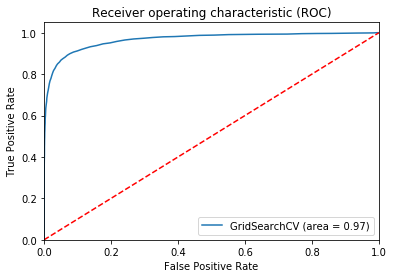

In [27]:
#plot ROC
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=2)

hypothesis_probs = best_clf.predict_proba(X_test)
hypothesis_preds = hypothesis_probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, hypothesis_preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('ROC Curve')
plt.show()

In [28]:
print("The AUC of the best classifier found via GridSearch is:", roc_auc)

The AUC of the best classifier found via GridSearch is: 0.9666869036732862


In [31]:
#Model evaluation metrics
hypothesis = best_clf.predict(X_test)
    
accuracy = metrics.accuracy_score(hypothesis, y_test)
    
balanced_accuracy = metrics.balanced_accuracy_score(hypothesis, y_test)

precision = metrics.precision_score(hypothesis, y_test)
    
average_precision = metrics.average_precision_score(hypothesis, y_test)
    
f1_score = metrics.f1_score(hypothesis, y_test)
    
recall = metrics.recall_score(hypothesis, y_test)

print("The model accuracy is: ", accuracy, "\n While the model precision is:", precision)
print("\nHere is the classification report:\n", metrics.classification_report(hypothesis, y_test))

The model accuracy is:  0.9011666666666667 
 While the model precision is: 0.5177685950413223

Here is the classification report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94     10728
           1       0.52      0.99      0.68      1272

   micro avg       0.90      0.90      0.90     12000
   macro avg       0.76      0.94      0.81     12000
weighted avg       0.95      0.90      0.91     12000



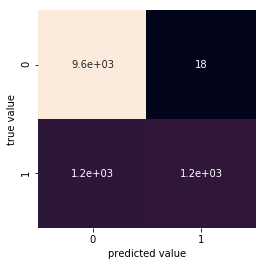

In [60]:
#confusion matrix for classifier 1
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred=best_clf.predict(X_test)
confusion_matrix(y_true, y_pred)

import seaborn as sns 
mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

# Results1 to CSV

In [33]:
#Recall 
New_predictions=best_clf.predict(test_data)
New_prediction_probs=best_clf.predict_proba(test_data) #here we predict probabilities of classes on our test data

#Export our resulting probability estimates for classes in test data to csv
Results1=pd.DataFrame(New_prediction_probs)
Results1.columns=['Class 0', 'Class 1']
Results1.shape #This is the correct shape as we predict 10,000 examples and get the probabilities for 2 classes
Results1.to_csv("Results1.csv", index=False, encoding='utf-8')

(10000, 2)

# Classifier 2

In [49]:
#out of the box lda
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=None, store_covariance=False, tol=0.0001)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

0.8900833333333333

In [47]:
#hyperparamter tuning fitting a pipeline with GBM
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

pipe2 = Pipeline([('classifier' , GradientBoostingClassifier())])


# Create param grid.

param_grid2 = [
    {'classifier' : [LinearDiscriminantAnalysis()],
    'classifier__solver' : ['svd', 'lsqr', 'eigen'],
    'classifier__n_components' : np.linspace(10, 129, 10),
    'classifier__shrinkage' : ['auto']},
    {'classifier' : [GradientBoostingClassifier()],
     'classifier_learning_rate' : np.linspace(0.0, 1.0, num=10),
     'classifier_max_depth' : np.linspace(1, 36, 36, endpoint=True),
     'classifier_min_samples_split' : np.linspace(0.1, 1.0, 10, endpoint=True),
     'classifier_min_samples_leaf' : np.linspace(0.1, 0.5, 5, endpoint=True),
    'classifier__n_estimators' : list(range(10,129,10)),
    'classifier__max_features' : list(range(6,36,5))} 
]

# Create grid search object

clf2 = GridSearchCV(pipe2, param_grid = param_grid2, cv = 5, verbose=True, n_jobs=4)

# Fit on data

best_clf2 = clf.fit(X_train, y_train)

Fitting 5 folds for each of 124 candidates, totalling 620 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   38.1s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed: 23.7min
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed: 55.5min
[Parallel(n_jobs=3)]: Done 620 out of 620 | elapsed: 112.1min finished


In [52]:
hyper_params2=best_clf2.best_estimator_.get_params()['classifier']
print("The hyper parameters of our best classifier are:", hyper_params2)

The hyper parameters of our best classifier are: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=35, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [53]:
#Scoring
best_clf2_score=best_clf2.score(X_test, y_test)
predictions2=best_clf2.predict(X_test)
probabilities2=best_clf2.predict_proba(X_test)
New_predictions2=best_clf2.predict(test_data)
New_prediction_probs2=best_clf2.predict_proba(test_data) #here we predict probabilities of classes on our test data
print("The score for our best classifier is: ", best_clf2_score)


The score for our best classifier is:  0.9008333333333334


/Users/lucasnewman/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic (ROC) for classifier 2')

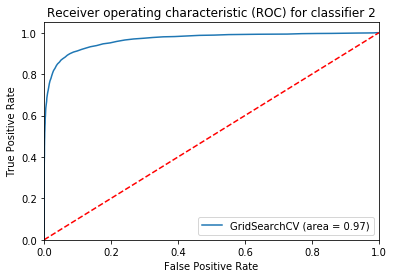

In [54]:
#metrics
from sklearn import metrics
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, predictions, pos_label=2)

hypothesis_probs2 = best_clf2.predict_proba(X_test)
hypothesis_preds2 = hypothesis_probs2[:,1]
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, hypothesis_preds2)
roc_auc2 = metrics.auc(fpr2, tpr2)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) for classifier 2')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for Classifier2 ')
plt.show()

In [55]:
print("The AUC of the best classifier found via GridSearch is:", roc_auc2)

The AUC of the best classifier found via GridSearch is: 0.967679372487448


In [57]:
#classifier metrics
hypothesis2 = best_clf2.predict(X_test)
    
accuracy2 = metrics.accuracy_score(hypothesis2, y_test)
    
balanced_accuracy2 = metrics.balanced_accuracy_score(hypothesis2, y_test)

precision2 = metrics.precision_score(hypothesis2, y_test)
    
average_precision2 = metrics.average_precision_score(hypothesis2, y_test)
    
f1_score2 = metrics.f1_score(hypothesis2, y_test)
    
recall2 = metrics.recall_score(hypothesis2, y_test)

print("The model accuracy is: ", accuracy2, "\n While the model precision is:", precision2)
print("\nHere is the classification report:\n", metrics.classification_report(hypothesis2, y_test))

The model accuracy is:  0.9008333333333334 
 While the model precision is: 0.515702479338843

Here is the classification report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94     10734
           1       0.52      0.99      0.68      1266

   micro avg       0.90      0.90      0.90     12000
   macro avg       0.76      0.94      0.81     12000
weighted avg       0.95      0.90      0.91     12000



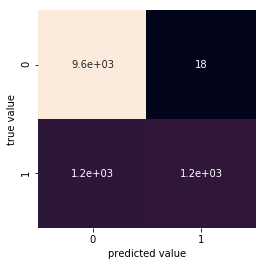

In [61]:
#confusion matrix for classifier 2
from sklearn.metrics import confusion_matrix
y_true2 = y_test
y_pred2=best_clf2.predict(X_test)
confusion_matrix(y_true2, y_pred2)

import seaborn as sns 
mat2 = confusion_matrix(y_true2, y_pred2)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

# Results 2 to CSV

In [58]:
#Recall 
New_predictions2=best_clf2.predict(test_data)
New_prediction_probs2=best_clf2.predict_proba(test_data) #here we predict probabilities of classes on our test data

#Export our resulting probability estimates for classes in test data to csv
Results2=pd.DataFrame(New_prediction_probs2)
Results2.columns=['Class 0', 'Class 1']
Results2.shape #This is the correct shape as we predict 10,000 examples and get the probabilities for 2 classes
Results2.to_csv("Results2.csv", index=False, encoding='utf-8')


(10000, 2)